# Exploración y determinación de solución parsimoniosa de MDS en matriz DTW de observaciones TEC

## Importación de librerías

In [1]:
from scripts.subscripts.MDS import TimeSeriesMDS
from numpy import loadtxt, float32

from matplotlib.pyplot import subplots, show
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
})

## Lectura de matriz DTW y declaración de parámetros

In [2]:
PTEX_dissim = loadtxt("../data/PTEX_DTW_matrix.dat", dtype= float32, delimiter = ",")

In [3]:
# Name of MDS procedures and number of dimensions to check stress-1
list_procedures = ("classic", "dissim", "SMACOF-euclidean", "SMACOF-dissim", "SMACOF-euclidean-classic", "SMACOF-dissim-classic")
list_dimensions = list(range(1, 11))

# SMACOF hyperpameters
max_iters = 2000
eps = 1e-6

# Time Series Clustering through MDS class instance
TECSeries_MDS = TimeSeriesMDS(dissimilarity = PTEX_dissim)

## Cálculo de Stress-1 sobre diferentes métodos de MDS

In [4]:
stress_by_procedure = dict()
stress_by_procedure["num_dimensions"] = list_dimensions

for procedure in list_procedures:
    stress_by_procedure[procedure] = len(list_dimensions)*[0.0]
    for k, num_dim in enumerate(list_dimensions):
        TECSeries_MDS.fit(num_comps = num_dim, method = procedure, max_iter = max_iters, eps = eps, verbose = 1, visualize_shepard = False)
        stress_by_procedure[procedure][k] = TECSeries_MDS.normalized_stress

classic with 1 components has a stress-1 value of 0.335731
classic with 2 components has a stress-1 value of 0.218967
classic with 3 components has a stress-1 value of 0.149569
classic with 4 components has a stress-1 value of 0.120887
classic with 5 components has a stress-1 value of 0.096429
classic with 6 components has a stress-1 value of 0.085863
classic with 7 components has a stress-1 value of 0.072349
classic with 8 components has a stress-1 value of 0.071370
classic with 9 components has a stress-1 value of 0.071118
classic with 10 components has a stress-1 value of 0.069535
dissim with 1 components has a stress-1 value of 0.335731
dissim with 2 components has a stress-1 value of 0.218967
dissim with 3 components has a stress-1 value of 0.149569
dissim with 4 components has a stress-1 value of 0.120887
dissim with 5 components has a stress-1 value of 0.096429
dissim with 6 components has a stress-1 value of 0.085863
dissim with 7 components has a stress-1 value of 0.072349
dis

/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 65 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 33 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 17 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid si

init 1 lasted 2000 iterations. final sigma: 642595840.0
init 2 lasted 2000 iterations. final sigma: 535352192.0
init 3 lasted 2000 iterations. final sigma: 548220480.0
init 4 lasted 2000 iterations. final sigma: 568196864.0
best sigma: 535352192.0
mds total runtime: 39.19069816201227 seconds
SMACOF-euclidean with 1 components has a stress-1 value of 0.446828
init 1 lasted 2000 iterations. final sigma: 38291368.0
init 2 lasted 2000 iterations. final sigma: 38415120.0
init 3 lasted 2000 iterations. final sigma: 37191392.0
init 4 lasted 2000 iterations. final sigma: 38321904.0
best sigma: 37191392.0
mds total runtime: 37.71548418600287 seconds
SMACOF-euclidean with 2 components has a stress-1 value of 0.117772
init 1 lasted 2000 iterations. final sigma: 12113358.0
init 2 lasted 2000 iterations. final sigma: 12706067.0
init 3 lasted 2000 iterations. final sigma: 12368032.0
init 4 lasted 2000 iterations. final sigma: 12901414.0
best sigma: 12113358.0
mds total runtime: 51.60895881400211 sec

## Ilustración de curvas de Stress-1

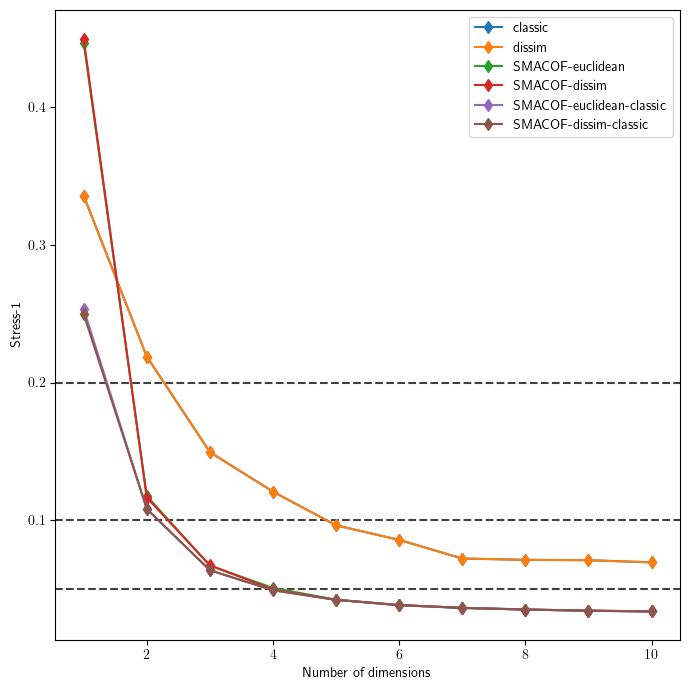

In [5]:
Figure, Subplot = subplots(1, 1, figsize = (7, 7))

for procedure in list_procedures:
    Subplot.plot("num_dimensions", procedure, "-d", data = stress_by_procedure)
Subplot.axhline(y = 0.2, color = "black", linestyle = "--", alpha = 0.75, zorder = 0)
Subplot.axhline(y = 0.1, color = "black", linestyle = "--", alpha = 0.75, zorder = 0)
Subplot.axhline(y = 0.05, color = "black", linestyle = "--", alpha = 0.75, zorder = 0)
Subplot.set_xlabel("Number of dimensions")
Subplot.set_ylabel("Stress-1")
Subplot.legend()

Figure.tight_layout()

show()

## Visualización de soluciones MDS parsimoniosas

init 1 lasted 2000 iterations. final sigma: 31456904.0
best sigma: 31456904.0
mds total runtime: 9.497996304999106 seconds
SMACOF-dissim-classic with 2 components has a stress-1 value of 0.108312
init 1 lasted 2000 iterations. final sigma: 10921734.0
best sigma: 10921734.0
mds total runtime: 12.974797251998098 seconds
SMACOF-dissim-classic with 3 components has a stress-1 value of 0.063821


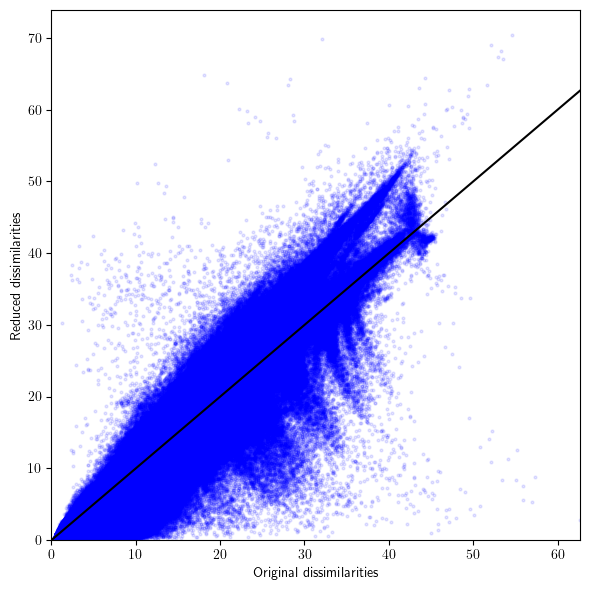

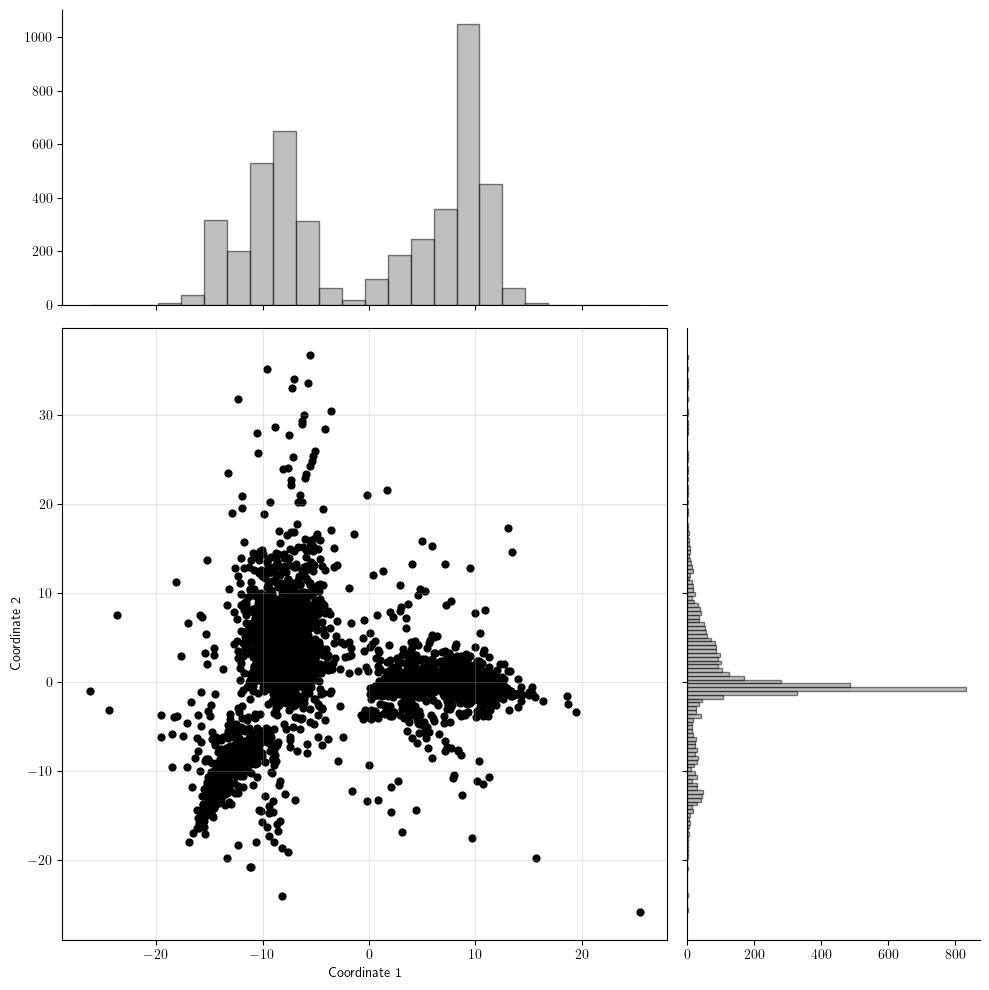

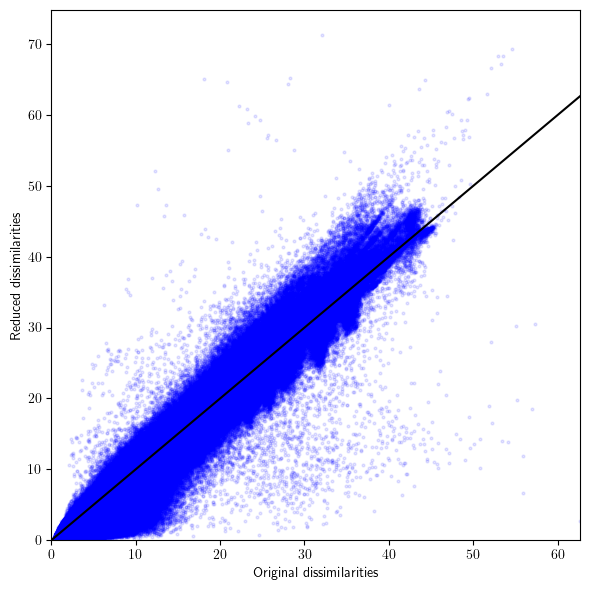

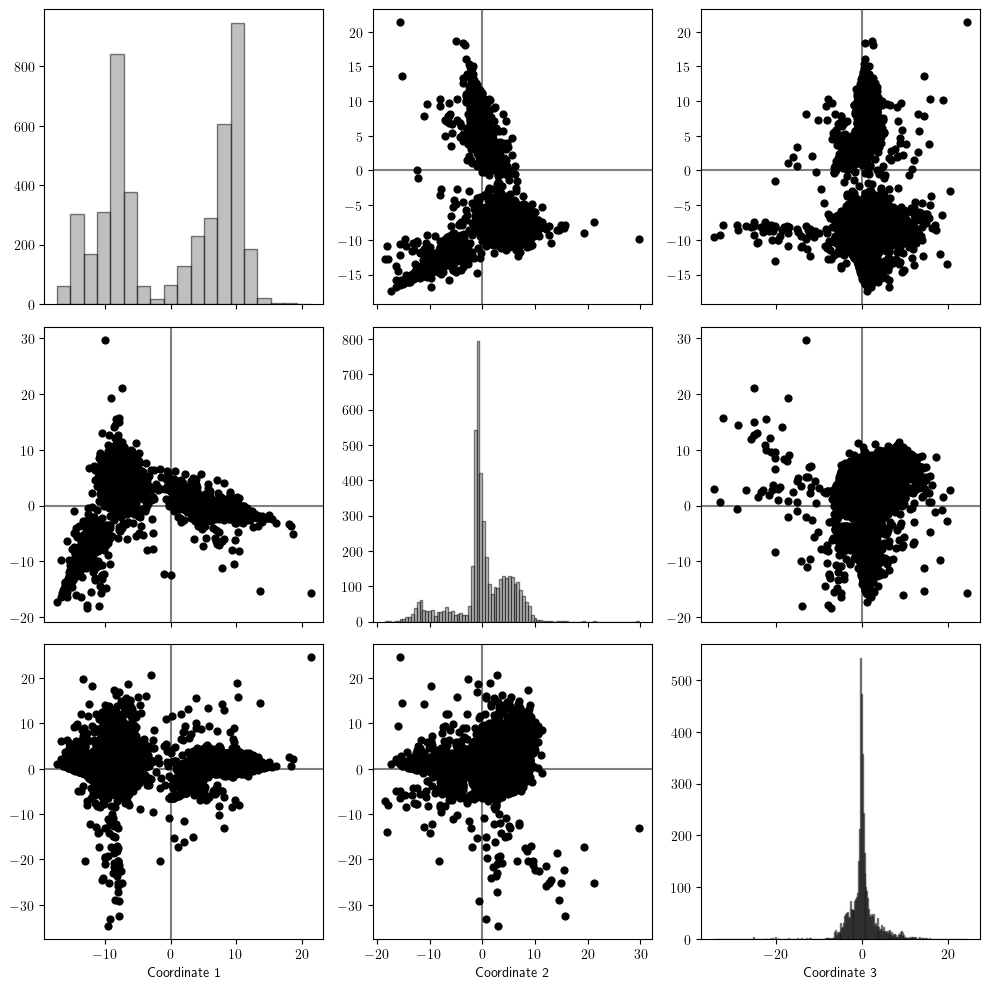

In [6]:
for p in (2, 3):
    TECSeries_MDS.fit(num_comps = p, method = "SMACOF-dissim-classic", max_iter = max_iters, eps = eps, verbose = 1, visualize_shepard = True)
    TECSeries_MDS.VisualizeVectors()